In [205]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.naive_bayes import MultinomialNB
from matplotlib.colors import ListedColormap
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import scikitplot as skplt

# Load data

In [206]:
#Data here used is preprocessed(deduplication,removal of html tags,punctuation,stop words,stemming)
con =sqlite3.connect(r'C:\Users\Friend\AI\AI_datasets\Amazon\cleaned_database.sqlite')
filtered_data  = pd.read_sql_query('SELECT * FROM Reviews WHERE Score != 3',con)
filtered_data = filtered_data.drop('index',axis = 1)

filtered_data = filtered_data.sort_values('Time')

# Sampling data

In [207]:
data = filtered_data.head(300000)
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'CleanedText'],
      dtype='object')

In [208]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(data['CleanedText'], data['Score'], test_size=0.3, random_state=0)
X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3, random_state=0)
print(X_cv.shape,y_cv.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(63000,) (63000,) (147000,) (147000,) (90000,) (90000,)


# BOW

In [209]:
# Performing BOW on review
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
vocabulary = count_vect.fit(X_train)

In [210]:
bag_of_words_train = count_vect.transform(X_train)
print(bag_of_words_train.shape)

(147000, 45505)


In [211]:
bag_of_words_cv = count_vect.transform(X_cv)
print(bag_of_words_train.shape)

(147000, 45505)


# Performance Metrics,cross validation

* Accuracy

In [212]:
#cross validation for different alpha values using accuracy as performance metric.
alphas = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
accuracy_bow = []
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(bag_of_words_train, y_train)
    pred = nb.predict(bag_of_words_cv)
    acc = accuracy_score(y_cv,pred, normalize=True) * float(100)
    accuracy_bow.append(acc)

At Alpha =  1 accuracy is  90.6015873015873


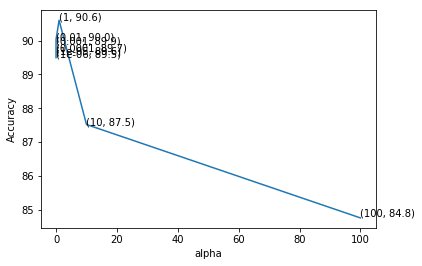

In [213]:
alpha = alphas[accuracy_bow.index(max(accuracy_bow))]
print('At Alpha = ',alpha,'accuracy is ',max(accuracy_bow))
plt.plot(alphas,accuracy_bow)
for xy in zip(alphas, np.round(accuracy_bow,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

* confusion matrix

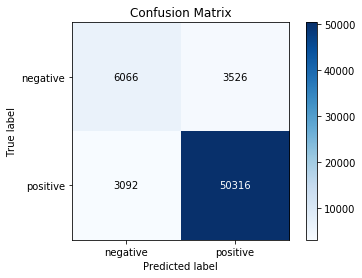

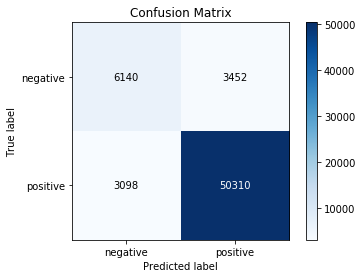

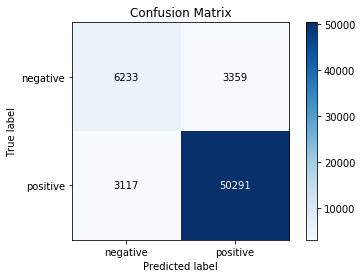

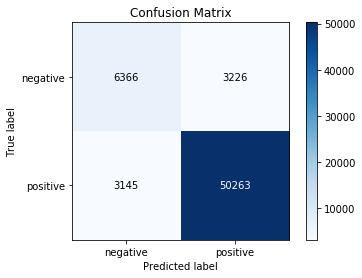

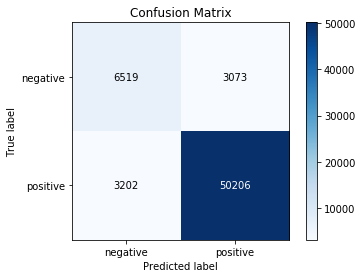

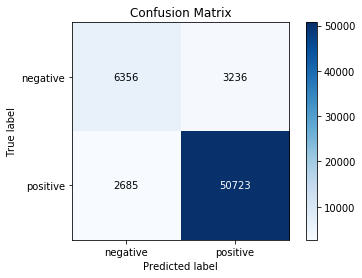

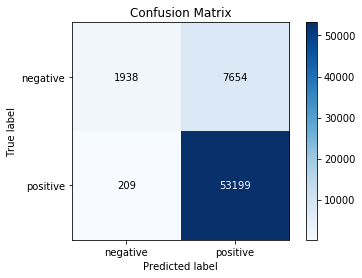

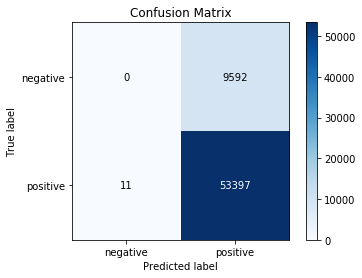

In [214]:
#cross validation for different alpha values using confusion matrix as performance metric.
alphas = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(bag_of_words_train, y_train)
    pred = nb.predict(bag_of_words_cv)
    skplt.metrics.plot_confusion_matrix(y_cv, pred, normalize=False)

* F1 Score

In [215]:
alphas = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
f1_score_bow = []
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(bag_of_words_train, y_train)
    pred = nb.predict(bag_of_words_cv)  
    tn, fp, fn, tp = confusion_matrix(y_cv, pred).ravel()
    pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
    score=(2*pr*re)/(pr+re)
    f1_score_bow.append(score)

At Alpha =  1 f1_score is  0.9448527014818333


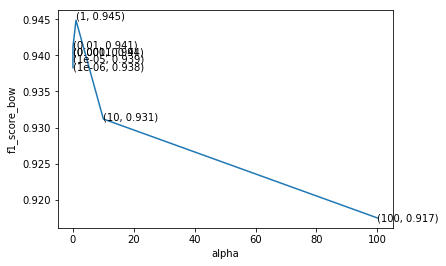

In [216]:
alpha_bow = alphas[f1_score_bow.index(max(f1_score_bow))]
print('At Alpha = ',alpha_bow,'f1_score is ',max(f1_score_bow))

plt.plot(alphas,f1_score_bow)
for xy in zip(alphas, np.round(f1_score_bow,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('alpha')
plt.ylabel('f1_score_bow')
plt.show()

In [241]:
f1_score_bow_train = max(f1_score_bow)

In [217]:
bag_of_words_test = count_vect.transform(X_test)
print(bag_of_words_test.shape)

(90000, 45505)


* Performing Naive Bayes for best alpha value.

accuracy for alpha = 1 is 90.44555555555556
f1 score for alpha = 1 is 0.9439662194303438


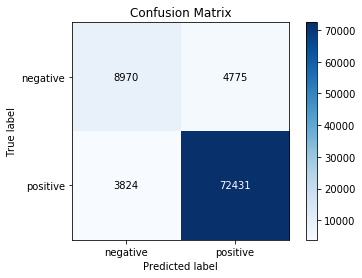

In [220]:
#Performing K-NN for optimal k-value using test data
nb = MultinomialNB(alpha=1)
nb.fit(bag_of_words_train, y_train)

#predicting using test data
pred = nb.predict(bag_of_words_test)

#Accuracy
acc = accuracy_score(y_test,pred, normalize=True) * float(100)
print('accuracy for alpha = 1 is',(acc))

#f1-score
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
f1_score_bow_test=(2*pr*re)/(pr+re)
print('f1 score for alpha = 1 is',(f1_score_bow_test))

#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

# tfidf

In [222]:
# Performing BOW on review
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
vocabulary = tf_idf_vect.fit(X_train)

In [223]:
tf_idf_train = tf_idf_vect.transform(X_train)
print(tf_idf_train.shape)

(147000, 1631076)


In [224]:
tf_idf_cv = tf_idf_vect.transform(X_cv)
print(tf_idf_cv.shape)

(63000, 1631076)


# Performance Metrics,cross validation

* Accuracy

In [225]:
#cross validation for different alpha values using accuracy as performance metric.
alphas = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
accuracy_tfidf = []
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(tf_idf_train, y_train)
    pred = nb.predict(tf_idf_cv)
    acc = accuracy_score(y_cv,pred, normalize=True) * float(100)
    accuracy_tfidf.append(acc)

At Alpha =  0.01 accuracy is  90.14761904761905


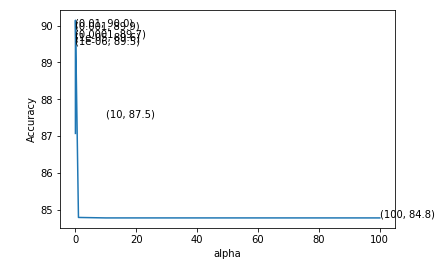

In [227]:
alpha = alphas[accuracy_tfidf.index(max(accuracy_tfidf))]
print('At Alpha = ',alpha,'accuracy is ',max(accuracy_tfidf))
plt.plot(alphas,accuracy_tfidf)
for xy in zip(alphas, np.round(accuracy_bow,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

* Confusion matrix

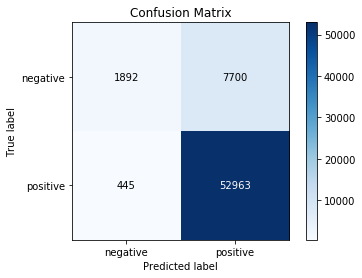

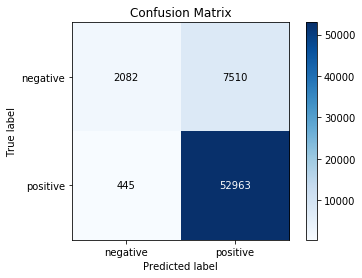

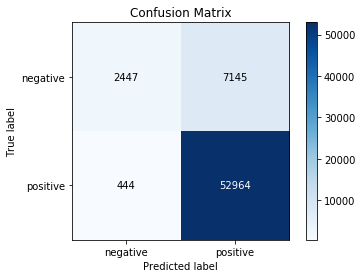

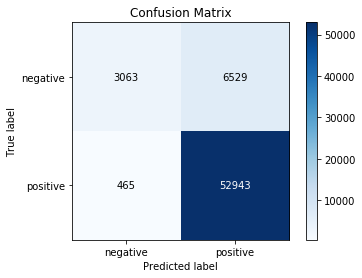

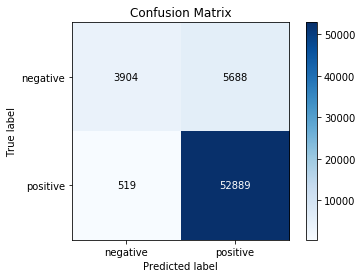

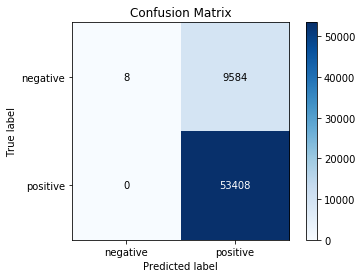

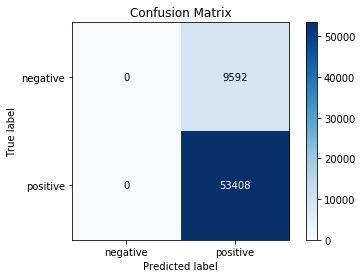

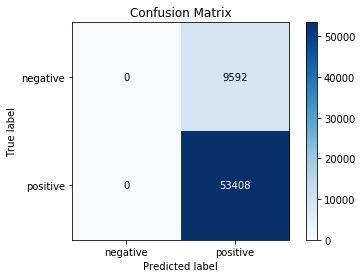

In [228]:
#cross validation for different alpha values using confusion matrix as performance metric.
alphas = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(tf_idf_train, y_train)
    pred = nb.predict(tf_idf_cv)
    skplt.metrics.plot_confusion_matrix(y_cv, pred, normalize=False)

* f1-score

In [233]:
alphas = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
f1_score_tfidf = []
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(tf_idf_train, y_train)
    pred = nb.predict(tf_idf_cv)  
    tn, fp, fn, tp = confusion_matrix(y_cv, pred).ravel()
    pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
    score=(2*pr*re)/(pr+re)
    f1_score_tfidf.append(score)

At Alpha =  0.01 f1_score is  0.9445729338750725


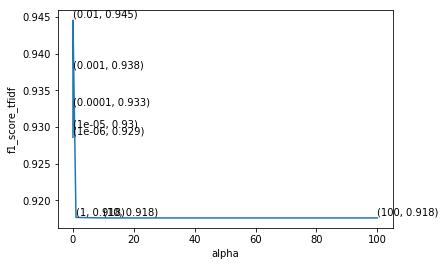

In [237]:
alpha_tfidf = alphas[f1_score_tfidf.index(max(f1_score_tfidf))]
print('At Alpha = ',alpha_tfidf,'f1_score is ',max(f1_score_tfidf))

plt.plot(alphas,f1_score_tfidf)
for xy in zip(alphas, np.round(f1_score_tfidf,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('alpha')
plt.ylabel('f1_score_tfidf')
plt.show()

In [243]:
f1_score_tfidf_train = max(f1_score_tfidf)

In [238]:
tf_idf_test = tf_idf_vect.transform(X_test)
print(tf_idf_test.shape)

(90000, 1631076)


* Performing Naive Bayes for best alpha value.

accuracy for alpha = 1 is 90.06888888888889
f1 score for alpha = 1 is 0.9441151460584233


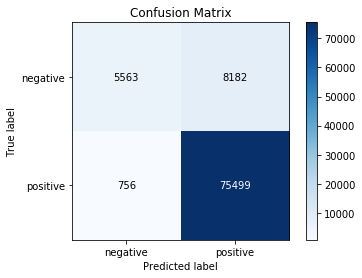

In [246]:
#Performing K-NN for optimal k-value using test data
nb = MultinomialNB(alpha=0.01)
nb.fit(tf_idf_train, y_train)

#predicting using test data
pred = nb.predict(tf_idf_test)

#Accuracy
acc = accuracy_score(y_test,pred, normalize=True) * float(100)
print('accuracy for alpha = 1 is',(acc))

#f1-score
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
pr,re = (tp)/(tp+fp),(tp)/(tp+fn)
f1_score_tfidf_test=(2*pr*re)/(pr+re)
print('f1 score for alpha = 1 is',(f1_score_tfidf_test))

#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

# Feature importance

In [221]:
neg_probs = nb.feature_log_prob_[0, :].argsort()
print(np.take(count_vect.get_feature_names(), neg_probs[0]))
pos_probs = nb.feature_log_prob_[1, :].argsort()
print(np.take(count_vect.get_feature_names(), pos_probs[0]))

aaa
ligo


# Conclusions

In [247]:
from prettytable import PrettyTable
    
Table = PrettyTable()

Table.field_names  = ["Model", "Hyper_parameter(K)", "Train f1-score", "Test f1-score"]

Table.add_row(["BOW", alpha_bow, f1_score_bow_train,f1_score_bow_test])
Table.add_row(["TF_IDF", alpha_tfidf, f1_score_tfidf_train,f1_score_tfidf_test])

print(Table)

+--------+--------------------+--------------------+--------------------+
| Model  | Hyper_parameter(K) |   Train f1-score   |   Test f1-score    |
+--------+--------------------+--------------------+--------------------+
|  BOW   |         1          | 0.9448527014818333 | 0.9439662194303438 |
| TF_IDF |        0.01        | 0.9445729338750725 | 0.9441151460584233 |
+--------+--------------------+--------------------+--------------------+
